In [48]:
import sys
sys.path.append("../python")

from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import json

In [49]:
parameters_path = "../configs/mlda_with_orientation.json"
    
file = open(parameters_path)
config = json.load(file)
file.close()

In [50]:
# Set center
center = (config["Geometry"]["Center"]["x"], config["Geometry"]["Center"]["y"])

# Set type
dipole_type = config["ModelConfig"]["Dipole"]["Type"]

# Set dipole
position = (config["ModelConfig"]["Dipole"]["Position"]["x"],config["ModelConfig"]["Dipole"]["Position"]["y"])

sample_path = config["Setup"]["OutputPath"] + config["Sampling"]["ResultFile"] + ".h5"
fin = h5py.File(sample_path)
samples = np.array( fin['/samples'] )
fin.close()

n = len(samples[0])

if dipole_type == 'Radial':
    s_ref = utility_functions.get_radial_dipole(position,center)
    sample_dict = {
        "x": samples[0],
        "y": samples[1]
    }
else:
    rho = config["ModelConfig"]["Dipole"]["Orientation"]["rho"]
    s_ref = utility_functions.get_dipole(position,center,rho)
    sample_dict = {
        "x": samples[0],
        "y": samples[1],
        "rho": samples[2]
    }

sample_dataset = az.dict_to_dataset(sample_dict)

[[95.3221553  95.3221553  95.3221553  ... 90.28279632 90.28279632
  90.28279632]
 [77.30688926 77.30688926 77.30688926 ... 79.71617286 79.71617286
  79.71617286]]


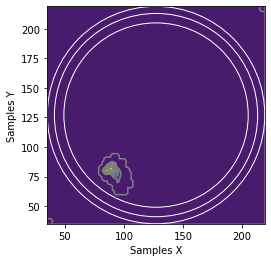

In [51]:
fig, ax = plt.subplots()
fig.subplots_adjust(wspace=.5)

print(samples[0:2])
im = evaluations.draw_densities(samples[0:2],ax)

evaluations.set_ax(ax)

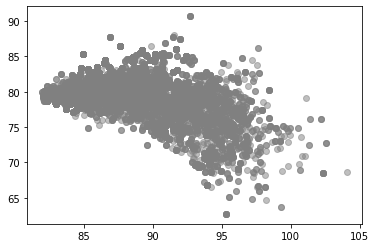

In [57]:
fig, ax = plt.subplots()
fig.subplots_adjust(wspace=.3)

#evaluations.set_ax(ax,"darkblue")
ax.scatter(samples[0, :], samples[1, :], c='gray', alpha=0.5)
#evaluations.draw_point(ax,position,0.7)

n = 256

mesh = msh.StructuredMesh(n)

x = np.zeros(n+1)
y = np.zeros(n+1)
z = np.ndarray((n,n),float)
g = np.ndarray((n,n),float)

x = mesh.nodes[:n,0]
y = mesh.nodes[:n,0]

for k in range(n):
    for j in range(n):
        z[k,j] = mesh.labels[k+n*j]
        g[k,j] = mesh.gray_probs[k+n*j]

ax.pcolormesh(x,y,g)
ax.set_aspect(1)

c = mesh.find_next_center(point)
print(c)
print(g[int(c[0]),int(c[1])])
